In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error,mean_absolute_error
import pickle
import os
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score

In [36]:
country = pd.read_excel('https://github.com/dsrscientist/dataset4/raw/main/Country-Code.xlsx')
country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


Loading the dataset into the dataframe.

In [55]:
country.shape

(15, 2)

In [47]:
z = "zomato_ml.csv"

In [39]:
import chardet
with open(z, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1254',
 'confidence': 0.49068171335281274,
 'language': 'Turkish'}

In [43]:
zomato = pd.read_csv(z,encoding='latin-1')
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Loading the second dataset into the dataframe.

In [48]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [49]:
zc = pd.merge(zomato, country, on='Country Code')
zc

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


Merging the two datasets for analysis.

In [46]:
zc.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [50]:
zc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [51]:
zc.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [52]:
zc.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


<AxesSubplot:>

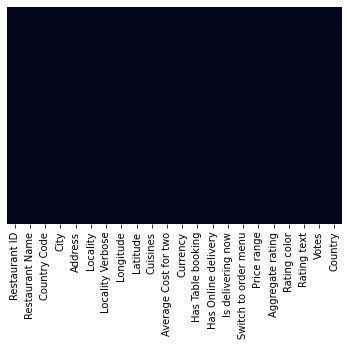

In [54]:
sns.heatmap(zc.isnull())

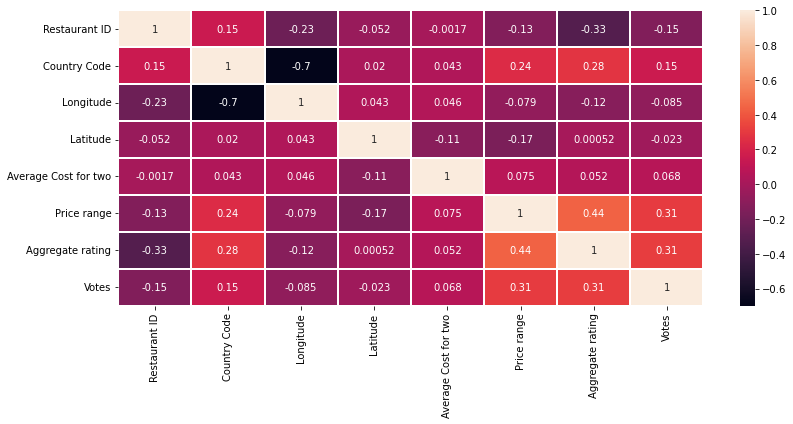

In [79]:
plt.figure(figsize=(12,6))
sns.heatmap(zc.corr(), annot=True, linewidths=2)
plt.tight_layout()
plt.show()

In [ ]:
The above heatmap displays the correlation between the columns.

In [59]:
country_name = zc.Country.value_counts().index
country_name

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [69]:
country_count = zc.Country.value_counts().values
country_count

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64


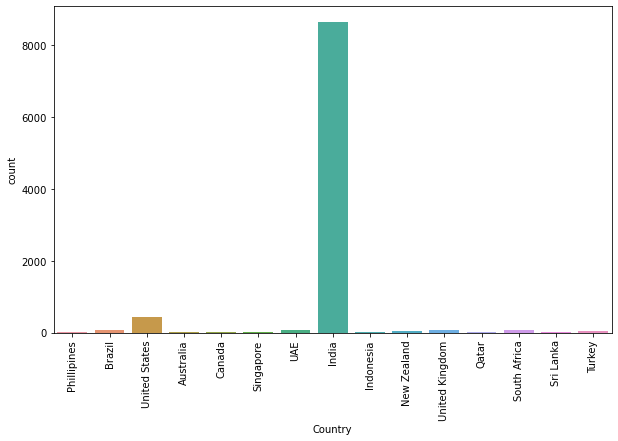

In [74]:
plt.figure(figsize = (10,6))
plt.xticks(rotation=90)
sns.countplot(x='Country', data=zc)
print(zc['Country'].value_counts())

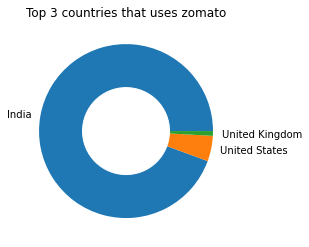

In [81]:
top_3 = zc['Country'].value_counts()[:3]
plt.pie(top_3,labels=top_3.index)                  #Plotting Pie Chart
circle = plt.Circle( (0,0), 0.5, color='white')    #Creating a Circle 
p=plt.gcf()                                        #Adding circle to the Pie Chart
p.gca().add_artist(circle)
plt.title("Top 3 countries that uses zomato")      #Add title
plt.show()

In [75]:
ratings = zc.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Counts'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Counts
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Counts'>

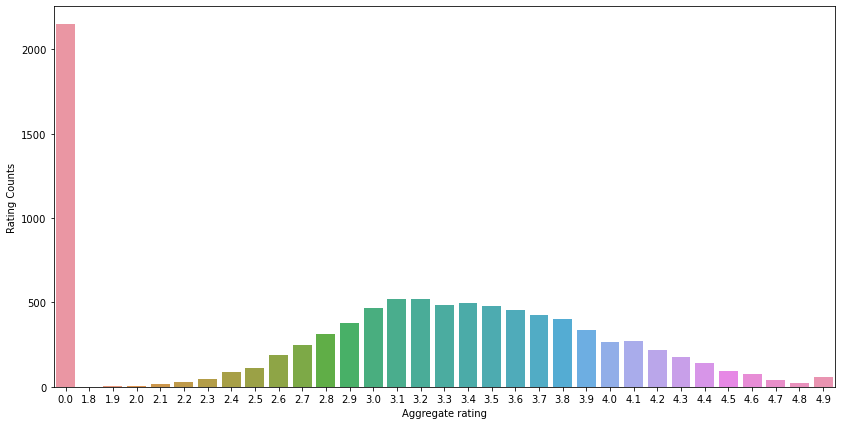

In [78]:
plt.figure(figsize = (14,7))
sns.barplot(x='Aggregate rating',y='Rating Counts',data=ratings)

In [82]:
avg_cost = zc.groupby(['Rating color']).mean().round()
avg_cost

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Rating color,,,,,,,,
Dark Green,10050684.0,113.0,26.0,19.0,8137.0,3.0,5.0,852.0
Green,9775255.0,69.0,42.0,23.0,3556.0,3.0,4.0,520.0
Orange,6124779.0,4.0,74.0,28.0,568.0,2.0,3.0,48.0
Red,3148048.0,6.0,76.0,28.0,638.0,2.0,2.0,91.0
White,15573392.0,1.0,66.0,25.0,340.0,1.0,0.0,1.0
Yellow,7594804.0,24.0,60.0,26.0,1045.0,2.0,4.0,229.0


In [84]:
average_cost_analysis = zc.groupby('Country')['Average Cost for two'].mean()
print("Average Cost for two in different countries:")
print(average_cost_analysis)

Average Cost for two in different countries:
Country
Australia             24.083333
Brazil               134.666667
Canada                36.250000
India                623.370319
Indonesia         281190.476190
New Zealand           69.750000
Phillipines         1606.818182
Qatar                223.750000
Singapore            155.750000
South Africa         419.733333
Sri Lanka           2375.000000
Turkey                84.852941
UAE                  166.416667
United Kingdom        47.812500
United States         26.152074
Name: Average Cost for two, dtype: float64


In [85]:
price_range_analysis = zc.groupby('Country')['Price range'].mean()
print("Average Price range in different countries:")
print(price_range_analysis)

Average Price range in different countries:
Country
Australia         2.125000
Brazil            3.400000
Canada            2.500000
India             1.721683
Indonesia         2.952381
New Zealand       3.150000
Phillipines       3.363636
Qatar             3.650000
Singapore         3.650000
South Africa      3.583333
Sri Lanka         2.850000
Turkey            2.823529
UAE               3.216667
United Kingdom    2.750000
United States     2.046083
Name: Price range, dtype: float64


In [91]:
category_cols = zc.select_dtypes(include=['object'])
print(category_cols.columns)
print('No. of category columns:', len(category_cols.columns))

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Switch to order menu', 'Rating color',
       'Rating text', 'Country'],
      dtype='object')
No. of category columns: 11


In [102]:
label_encoder = LabelEncoder()
zc['Has Table booking'] = label_encoder.fit_transform(zc['Has Table booking'])
zc['Has Online delivery'] = label_encoder.fit_transform(zc['Has Online delivery'])
zc['Is delivering now'] = label_encoder.fit_transform(zc['Is delivering now'])
zc['Price range'] = label_encoder.fit_transform(zc['Price range'])
zc['Restaurant Name'] = label_encoder.fit_transform(zc['Restaurant Name'])
zc['City'] = label_encoder.fit_transform(zc['City'])
zc['Address'] = label_encoder.fit_transform(zc['Address'])
zc['Locality'] = label_encoder.fit_transform(zc['Locality'])
zc['Locality Verbose'] = label_encoder.fit_transform(zc['Locality Verbose'])
zc['Rating color'] = label_encoder.fit_transform(zc['Rating color'])
zc['Rating text'] = label_encoder.fit_transform(zc['Rating text'])
zc['Country'] = label_encoder.fit_transform(zc['Country'])
zc['Cuisines'] = label_encoder.fit_transform(zc['Cuisines'])
zc['Switch to order menu'] = label_encoder.fit_transform(zc['Switch to order menu'])
zc['Currency'] = label_encoder.fit_transform(zc['Currency'])

In [101]:
zc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   int64  
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   int64  
 4   Address               9551 non-null   int64  
 5   Locality              9551 non-null   int64  
 6   Locality Verbose      9551 non-null   int64  
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   int64  
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   int64  
 13  Has Online delivery   9551 non-null   int64  
 14  Is delivering now     9551 non-null   int64  
 15  Switch to order menu 

In [103]:
X = zc.drop(['Average Cost for two', 'Country'], axis=1)
y_cost = zc['Average Cost for two']
y_range = zc['Price range']

In [104]:
X_train, X_test, y_cost_train, y_cost_test = train_test_split(X, y_cost, test_size=0.2, random_state=42)
_, _, y_range_train, y_range_test = train_test_split(X, y_range, test_size=0.2, random_state=42)

In [107]:
cost_model = RandomForestRegressor(random_state=42)
cost_model.fit(X_train, y_cost_train)
y_cost_pred = cost_model.predict(X_test)
mean_ae_cost = mean_absolute_error(y_cost_test, y_cost_pred)
print("Mean Absolute Error (Average Cost for two):", mean_ae_cost)

Mean Absolute Error (Average Cost for two): 679.0905599162743


In [108]:
range_model = RandomForestRegressor(random_state=42)
range_model.fit(X_train, y_range_train)
y_range_pred = range_model.predict(X_test)
mae_range = mean_absolute_error(y_range_test, y_range_pred)
print("Mean Absolute Error (Price range):", mae_range)

Mean Absolute Error (Price range): 0.0
